In [ ]:

from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt

creds = service_account.Credentials.from_service_account_file(
    # put your authentication 
)
client = bigquery.Client(credentials=creds)

# Specify the dataset and table IDs
dataset_id = 'ds_olist_fact'
table_id = 'fact_order'

# Construct the table reference
table_ref = client.dataset(dataset_id).table(table_id)

# Read the table
df = client.list_rows(table_ref).to_dataframe()

# Print the results
print(df.head())

/home/luser/miniconda3/envs/dwh/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                        customer_id                          order_id  \
0  08c5351a6aca1c1589a38f244edeee9d  2e7a8482f6fb09756ca50c10d7bfc047   
1  683c54fc24d40ee9f8a6fc179fd9856c  e5fa5a7210941f7d56d0208e4e071d35   
2  622e13439d6b5a0b486c435618b2679e  809a282bbd5dbcabb6f2f724fca862ec   
3  b106b360fe2ef8849fbbd056f777b4d5  71303d7e93b399f5bcd537d124c0bcfa   
4  355077684019f7f60a031656bd7262b8  3b697a20d9e427646d92567910af6d57   

  order_purchase_timestamp  payment_value payment_type  \
0      2016-09-04 21:15:19         136.23  credit_card   
1      2016-09-05 00:15:34          75.06  credit_card   
2      2016-09-13 15:24:19          40.95  credit_card   
3      2016-10-02 22:07:52         109.34  credit_card   
4      2016-10-03 09:44:50          45.46       boleto   

  purchase_month_and_year  purchase_year  
0                 2016-09           2016  
1                 2016-09           2016  
2                 2016-09           2016  
3                 2016-10           2016

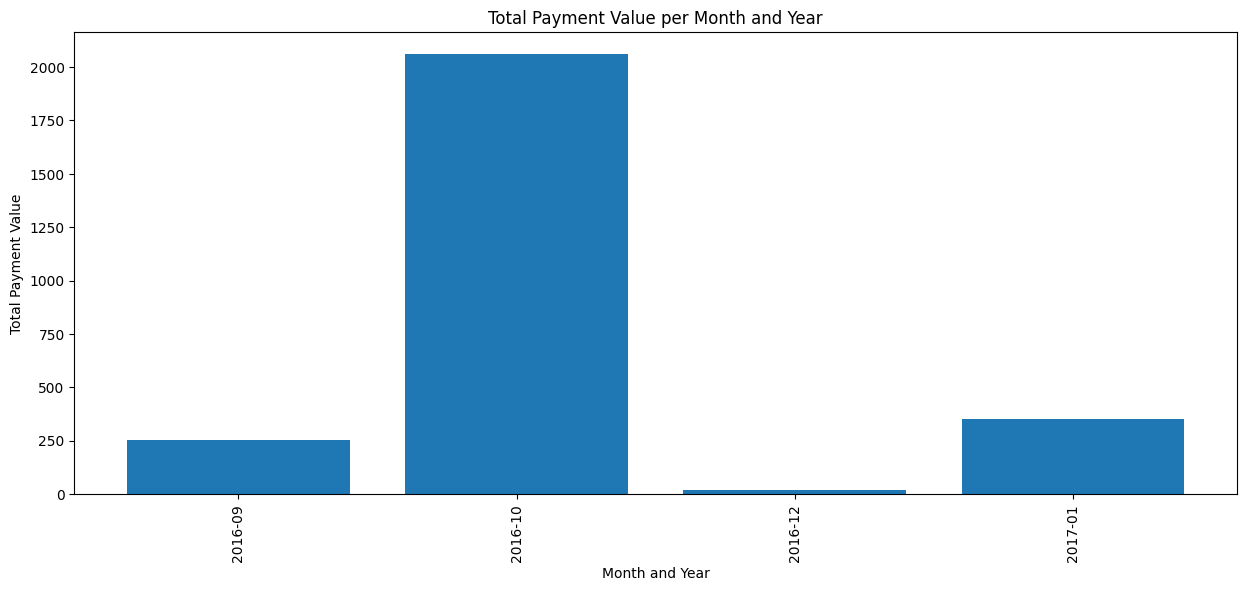

In [2]:
#group by purchase_month_and_year and sum the payment_value
df_grouped = df.groupby('purchase_month_and_year').agg({'payment_value':'sum'}).reset_index()
#plot the results in bar chart
plt.figure(figsize=(15, 6))
plt.bar(df_grouped['purchase_month_and_year'], df_grouped['payment_value'])
plt.xlabel('Month and Year')
plt.ylabel('Total Payment Value')
plt.title('Total Payment Value per Month and Year')
plt.xticks(rotation=90)
plt.show()
